In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet
import statsmodels.api as sm
from scipy import stats
from plotly import tools
import plotly.graph_objects as go
import plotly.express as py
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plt.style.use("seaborn-whitegrid")

<ipython-input-57-efa3abe90440>:16: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [58]:
df = pd.read_csv('all_stocks_5yr.csv')

In [59]:
df.shape

(619040, 7)

In [60]:
amzn = df[df['Name']=='AMZN']
amzn.head()

,date,open,high,low,close,volume,Name
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [61]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 111.0+ KB


In [62]:
amzn_df = amzn.copy()

In [84]:
amzn_df.loc[:, 'date'].head(5)

,date
46387,2013-02-08
46388,2013-02-11
46389,2013-02-12
46390,2013-02-13
46391,2013-02-14


In [82]:
amzn_df['date'] = pd.to_datetime(amzn_df['date'], errors='coerce')

In [83]:
amzn_df.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [86]:
amzn_df.sample(5)

,date,open,high,low,close,volume,Name
46817,2014-10-23,313.40,316.800,311.40,313.180,9038193,AMZN
47447,2017-04-26,910.30,915.749,907.56,909.290,2608948,AMZN
47561,2017-10-06,975.64,995.750,975.64,989.580,3782067,AMZN
46631,2014-01-29,392.16,392.850,383.24,384.200,3399294,AMZN
46574,2013-11-05,356.78,360.170,354.84,358.892,2007275,AMZN


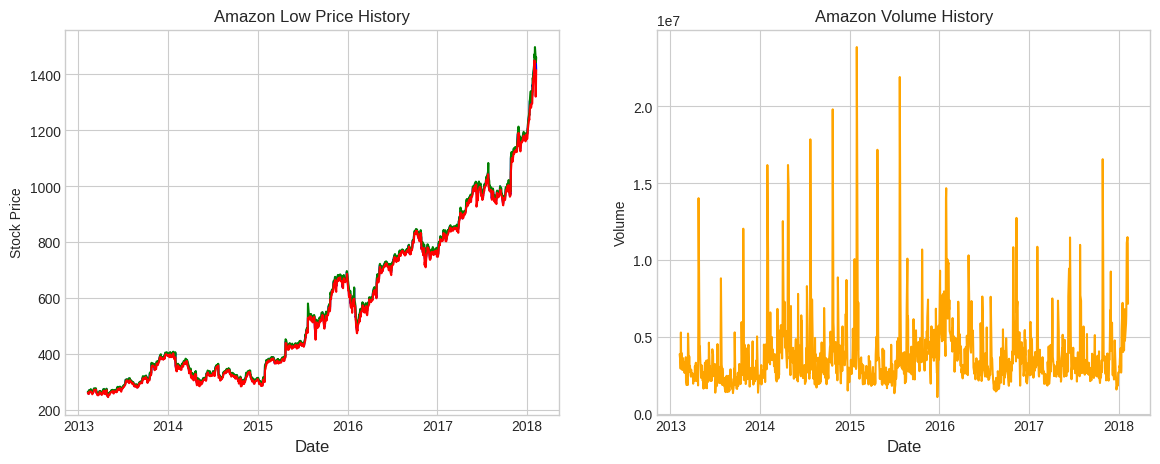

In [89]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.plot(amzn_df['date'], amzn_df['close'], color='blue')
ax1.set_title('Amazon Close Price History')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Stock Price')

ax1.plot(amzn_df['date'], amzn_df['high'], color='green')
ax1.set_title('Amazon High Price History')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Stock Price')

ax1.plot(amzn_df['date'], amzn_df['low'], color='red')
ax1.set_title('Amazon Low Price History')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Stock Price')

ax2.plot(amzn_df['date'], amzn_df['volume'], color='orange')
ax2.set_title('Amazon Volume History')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Volume')

plt.show()

In [93]:
m = Prophet()
ph_df = amzn_df.drop(['open', 'high', 'low','volume', 'Name'], axis=1)
ph_df.rename(columns={'date':'ds', 'close': 'y'}, inplace=True)

ph_df.head()

m.fit(ph_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgdhhfpe1/tplxe0js.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgdhhfpe1/fzomj2sf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61210', 'data', 'file=/tmp/tmpgdhhfpe1/tplxe0js.json', 'init=/tmp/tmpgdhhfpe1/fzomj2sf.json', 'output', 'file=/tmp/tmpgdhhfpe1/prophet_modelj6ysjnje/prophet_model-20240906185838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:58:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:58:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [98]:
future_prices = m.make_future_dataframe(periods = 700)

forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1954,2020-01-04,2146.985302,995.913102,3406.031496
1955,2020-01-05,2149.157547,988.663467,3415.141214
1956,2020-01-06,2129.334065,955.177765,3403.339280
1957,2020-01-07,2131.836104,990.876482,3397.249797
1958,2020-01-08,2134.456713,946.889175,3418.563506
